In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# Exploratory Data Analysis (EDA)

In [78]:
df = pd.read_excel(r'C:\Users\user\Documents\SDGP\cricket_data.xlsx', 'bowling')
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium


In [79]:
df.shape

(2686, 11)

In [80]:
df.columns

Index(['player', 'player_role', 'O', 'M', 'R', 'W', 'ER', 'team_name',
       'opp_name', 'teams', 'venue'],
      dtype='object')

In [81]:
df.isnull().sum()

player         0
player_role    0
O              0
M              0
R              0
W              0
ER             0
team_name      2
opp_name       2
teams          0
venue          0
dtype: int64

In [82]:
df.dtypes

player          object
player_role     object
O              float64
M                int64
R                int64
W                int64
ER             float64
team_name       object
opp_name        object
teams           object
venue           object
dtype: object

In [83]:
df['player'].nunique()

210

In [84]:
df['player'].unique()

array(['Jerome Taylor', 'Samuel Badree', 'Ashley Nurse',
       'Carlos Brathwaite', 'Rayad Emrit', 'Tim Southee', 'Trent Boult',
       'Anaru Kitchen', 'Mitchell Santner', 'Ish Sodhi', 'Mohammad Amir',
       'Rumman Raees', 'Shadab Khan', 'Hasan Ali', 'Faheem Ashraf',
       'Mohammad Nawaz', 'Seth Rance', 'Colin de Grandhomme',
       'Colin Munro', 'Ben Wheeler', 'Aamer Yamin', 'Kane Richardson',
       'Billy Stanlake', 'Ashton Agar', 'Andrew Tye', 'Adam Zampa',
       'Marcus Stoinis', 'Travis Head', 'Glenn Maxwell', 'David Willey',
       'Mark Wood', 'Chris Jordan', 'Tom Curran', 'Adil Rashid',
       'Liam Dawson', 'Liam Plunkett', 'Shehan Madushanka',
       'Danushka Gunathilaka', 'Isuru Udana', 'Thisara Perera',
       'Akila Dananjaya', 'Jeevan Mendis', 'Nazmul Islam',
       'Mohammad Saifuddin', 'Mahmudullah', 'Rubel Hossain',
       'Mustafizur Rahman', 'Afif Hossain', "D'Arcy Short",
       'Dane Paterson', 'Junior Dala', 'Chris Morris', 'Tabraiz Shamsi',
       'JJ S

In [85]:
df['team_name'].nunique()

9

In [86]:
df['team_name'].unique()

array(['WI', 'NZ', 'PAK', 'AUS', 'ENG', 'SL', 'BAN', 'SA', 'IND', nan],
      dtype=object)

In [87]:
df['venue'].nunique()

52

In [88]:
df['venue'].unique()

array(['Bay Oval, Mount Maunganui', 'Westpac Trust Stadium', 'Eden Park',
       'Bay Oval', 'Sydney Cricket Ground', 'Bellerive Oval',
       'Melbourne Cricket Ground', 'Westpac Stadium',
       'Shere Bangla National Stadium', 'Wanderers Stadium',
       'Sylhet Stadium', 'Seddon Park', 'SuperSport Park', 'Newlands',
       'R Premadasa Stadium', 'National Stadium (Karachi)', 'Edgbaston',
       'Old Trafford', 'Sophia Gardens', 'Warner Park',
       'Central Broward Regional Park', 'Sheikh Zayed Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Ekana International Cricket Stadium', 'Metricon Stadium',
       'Brisbane Cricket Ground',
       'Dr YS Rajasekhara Reddy Cricket Stadium', 'M Chinnaswamy Stadium',
       'Daren Sammy National Cricket Stadium',
       'Pallekele International Cricket Stadium', 'Gaddafi Stadium',
       'Arun Jaitley Stadium', 'Manuka Oval', 'Saxton Oval',
       'Greenfield International Stadium', 'Wankhede Stadium',
       '

# Data Preprocessing

In [89]:
df = df.dropna()
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium


In [90]:
df = df.drop(index = df[df['player_role'] == 'BAT'].index)  #Removing Batsmen from the bowling dataframe
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui"
...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium


In [91]:
df.shape

(2618, 11)

In [92]:
df.isnull().sum()

player         0
player_role    0
O              0
M              0
R              0
W              0
ER             0
team_name      0
opp_name       0
teams          0
venue          0
dtype: int64

In [93]:
df.describe()

,O,M,R,W,ER
count,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
mean,3.313751,0.020626,27.306341,1.024446,8.468220
std,0.967999,0.142157,11.071869,0.999510,3.163847
min,0.100000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,20.000000,0.000000,6.250000
50%,4.000000,0.000000,27.000000,1.000000,8.000000
75%,4.000000,0.000000,34.000000,2.000000,10.250000
max,4.000000,1.000000,64.000000,5.000000,36.000000


In [94]:
o_conditions = [
    (df['O'] > 3),
    (df['O'] > 2) & (df['O'] <= 3),
    (df['O'] > 1) & (df['O'] <= 2),
    (df['O'] > 0) & (df['O'] <= 1),
    (df['O'] == 0)
]


o_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['O_points'] = np.select(o_conditions, o_values)
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue,O_points
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,0.75


In [95]:
m_conditions = [
    (df['M'] > 0),
    (df['M'] <= 0)
]


m_values = [
    1,
    0
]

df['M_points'] = np.select(m_conditions, m_values)
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue,O_points,M_points
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,0.75,0


In [96]:
w_conditions = [
    (df['W'] > 3),
    (df['W'] > 2) & (df['W'] <= 3),
    (df['W'] > 1) & (df['W'] <= 2),
    (df['W'] > 0) & (df['W'] <= 1),
    (df['W'] <= 0)
]


w_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['W_points'] = np.select(w_conditions, w_values)
df.head(20)

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue,O_points,M_points,W_points
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25
5,Tim Southee,BOWL,2.3,0,21,3,8.40,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0,0.75
6,Trent Boult,BOWL,4.0,0,29,2,7.25,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50
8,Mitchell Santner,BOWL-AR,2.0,0,16,0,8.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0,0.00
9,Ish Sodhi,BOWL,4.0,0,25,2,6.25,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50
10,Mohammad Amir,BOWL,3.0,0,13,0,4.33,PAK,NZ,NZ vs PAK,Westpac Trust Stadium,0.75,0,0.00


In [97]:
er_conditions = [
    (df['ER'] <= 1),
    (df['ER'] > 1) & (df['ER'] <= 3),
    (df['ER'] > 3) & (df['ER'] <= 7),
    (df['ER'] > 7) & (df['ER'] <= 10),
    (df['ER'] > 10)
]


er_values = [
    1,
    0.75,
    0.5,
    0.25,
    0
]

df['ER_points'] = np.select(er_conditions, er_values)
df.head(20)

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue,O_points,M_points,W_points,ER_points
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25,0.00
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00,0.00
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00,0.00
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50,0.00
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25,0.00
5,Tim Southee,BOWL,2.3,0,21,3,8.40,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.75,0,0.75,0.25
6,Trent Boult,BOWL,4.0,0,29,2,7.25,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50,0.25
8,Mitchell Santner,BOWL-AR,2.0,0,16,0,8.00,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",0.50,0,0.00,0.25
9,Ish Sodhi,BOWL,4.0,0,25,2,6.25,NZ,WI,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50,0.50
10,Mohammad Amir,BOWL,3.0,0,13,0,4.33,PAK,NZ,NZ vs PAK,Westpac Trust Stadium,0.75,0,0.00,0.50


In [98]:
df['performance_index'] = df['O_points'] + df['M_points'] + df['W_points'] + df['ER_points']
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue,O_points,M_points,W_points,ER_points,performance_index
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25,0.00,1.25
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00,0.00,1.00
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00,0.00,1.00
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50,0.00,1.50
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25,0.00,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0,0.25,0.50,1.75
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0,0.25,0.50,1.75
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0,0.25,0.50,1.75
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,0.75,0,0.25,0.25,1.25


In [99]:
df.describe()

,O,M,R,W,ER,O_points,M_points,W_points,ER_points,performance_index
count,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
mean,3.313751,0.020626,27.306341,1.024446,8.468220,0.838999,0.020626,0.254966,0.281895,1.396486
std,0.967999,0.142157,11.071869,0.999510,3.163847,0.237015,0.142157,0.245856,0.203581,0.535944
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000
25%,3.000000,0.000000,20.000000,0.000000,6.250000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,0.000000,27.000000,1.000000,8.000000,1.000000,0.000000,0.250000,0.250000,1.500000
75%,4.000000,0.000000,34.000000,2.000000,10.250000,1.000000,0.000000,0.500000,0.500000,1.750000
max,4.000000,1.000000,64.000000,5.000000,36.000000,1.000000,1.000000,1.000000,1.000000,3.250000


In [100]:
performance_conditions = [
    (df['performance_index'] > 1.50),
    (df['performance_index'] >= 1.00) & (df['performance_index'] <= 1.50),
    (df['performance_index'] < 1),
]


performance_values = [
    2,
    1,
    0
]

df['performance'] = np.select(performance_conditions, performance_values)
df

,player,player_role,O,M,R,W,ER,team_name,opp_name,teams,venue,O_points,M_points,W_points,ER_points,performance_index,performance
0,Jerome Taylor,BOWL,4.0,0,53,1,13.25,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25,0.00,1.25,1
1,Samuel Badree,BOWL,4.0,0,51,0,12.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00,0.00,1.00,1
2,Ashley Nurse,BOWL,4.0,0,43,0,10.75,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.00,0.00,1.00,1
3,Carlos Brathwaite,BOWL-AR,4.0,0,50,2,12.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.50,0.00,1.50,1
4,Rayad Emrit,BOWL-AR,4.0,0,42,1,10.50,WI,NZ,NZ vs WI,"Bay Oval, Mount Maunganui",1.00,0,0.25,0.00,1.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,3.4,0,21,1,5.73,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0,0.25,0.50,1.75,2
2682,Ashton Agar,BOWL-AR,4.0,0,17,1,4.25,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0,0.25,0.50,1.75,2
2683,Adam Zampa,BOWL,4.0,0,24,1,6.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,1.00,0,0.25,0.50,1.75,2
2684,Andrew Tye,BOWL,3.0,0,27,1,9.00,AUS,BAN,BAN vs AUS,Shere Bangla National Stadium,0.75,0,0.25,0.25,1.25,1


In [101]:
df = df.filter(['player', 'player_role', 'team_name', 'opp_name', 'venue', 'performance'])
df

,player,player_role,team_name,opp_name,venue,performance
0,Jerome Taylor,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1
1,Samuel Badree,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1
2,Ashley Nurse,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1
3,Carlos Brathwaite,BOWL-AR,WI,NZ,"Bay Oval, Mount Maunganui",1
4,Rayad Emrit,BOWL-AR,WI,NZ,"Bay Oval, Mount Maunganui",1
...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,AUS,BAN,Shere Bangla National Stadium,2
2682,Ashton Agar,BOWL-AR,AUS,BAN,Shere Bangla National Stadium,2
2683,Adam Zampa,BOWL,AUS,BAN,Shere Bangla National Stadium,2
2684,Andrew Tye,BOWL,AUS,BAN,Shere Bangla National Stadium,1


In [102]:
le_player = LabelEncoder()
le_opp_name = LabelEncoder()
le_venue = LabelEncoder()

In [103]:
df['player_id'] = le_player.fit_transform(df['player'])
df['opp_id'] = le_opp_name.fit_transform(df['opp_name'])
df['venue_id'] = le_venue.fit_transform(df['venue'])
df

,player,player_role,team_name,opp_name,venue,performance,player_id,opp_id,venue_id
0,Jerome Taylor,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1,83,4,2
1,Samuel Badree,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1,158,4,2
2,Ashley Nurse,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1,19,4,2
3,Carlos Brathwaite,BOWL-AR,WI,NZ,"Bay Oval, Mount Maunganui",1,30,4,2
4,Rayad Emrit,BOWL-AR,WI,NZ,"Bay Oval, Mount Maunganui",1,153,4,2
...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,AUS,BAN,Shere Bangla National Stadium,2,87,1,38
2682,Ashton Agar,BOWL-AR,AUS,BAN,Shere Bangla National Stadium,2,20,1,38
2683,Adam Zampa,BOWL,AUS,BAN,Shere Bangla National Stadium,2,5,1,38
2684,Andrew Tye,BOWL,AUS,BAN,Shere Bangla National Stadium,1,15,1,38


In [104]:
group = df.groupby('team_name')
group

In [105]:
df_oppositionIDs = df[['opp_name', 'opp_id']]
df_oppositionIDs = df_oppositionIDs.drop_duplicates(subset='opp_name', keep='first')
df_oppositionIDs

,opp_name,opp_id
0,NZ,4
5,WI,8
16,PAK,5
50,AUS,0
55,ENG,2
88,BAN,1
94,SL,7
111,IND,3
117,SA,6


In [106]:
df_venueIDs = df[['venue', 'venue_id']]
df_venueIDs = df_venueIDs.drop_duplicates(subset='venue', keep='first')
df_venueIDs

,venue,venue_id
0,"Bay Oval, Mount Maunganui",2
10,Westpac Trust Stadium,51
23,Eden Park,13
34,Bay Oval,1
44,Sydney Cricket Ground,42
55,Bellerive Oval,3
67,Melbourne Cricket Ground,26
77,Westpac Stadium,50
88,Shere Bangla National Stadium,38
111,Wanderers Stadium,47


#### Sri Lankan Players details

In [107]:
df_bowl_sl = group.get_group('SL')
df_bowl_sl = df_bowl_sl[['player', 'player_role', 'player_id']]
df_bowl_sl = df_bowl_sl.drop_duplicates(subset='player', keep='first')
df_bowl_sl 

,player,player_role,player_id
88,Shehan Madushanka,BOWL,170
89,Danushka Gunathilaka,BAT-AR,41
90,Isuru Udana,BOWL-AR,70
91,Thisara Perera,BOWL-AR,182
92,Akila Dananjaya,BOWL,10
93,Jeevan Mendis,BOWL-AR,81
124,Dasun Shanaka,BAT-AR,43
126,M Amila Aponso,BOWL,114
183,Dushmantha Chameera,BOWL,49
184,Nuwan Pradeep,BOWL,144


#### England Players Details

In [108]:
df_bowl_eng = group.get_group('ENG')
df_bowl_eng = df_bowl_eng[['player', 'player_role', 'player_id']]
df_bowl_eng = df_bowl_eng.drop_duplicates(subset='player', keep='first')
df_bowl_eng

,player,player_role,player_id
62,David Willey,BOWL-AR,44
63,Mark Wood,BOWL,119
64,Chris Jordan,BOWL,32
65,Tom Curran,BOWL-AR,184
66,Adil Rashid,BOWL,6
76,Liam Dawson,BOWL-AR,108
80,Liam Plunkett,BOWL,109
304,Moeen Ali,BAT-AR,128
316,Jacob Ball,BOWL,72
388,Joe Denly,BAT-AR,85


#### Australian Players Details

In [109]:
df_bowl_aus = group.get_group('AUS')
df_bowl_aus = df_bowl_aus[['player', 'player_role', 'player_id']]
df_bowl_aus = df_bowl_aus.drop_duplicates(subset='player', keep='first')
df_bowl_aus

,player,player_role,player_id
44,Kane Richardson,BOWL,91
45,Billy Stanlake,BOWL,26
46,Ashton Agar,BOWL-AR,20
47,Andrew Tye,BOWL,15
48,Adam Zampa,BOWL,5
49,Marcus Stoinis,BAT-AR,117
60,Travis Head,BAT-AR,185
61,Glenn Maxwell,BAT-AR,56
296,Mitchell Swepson,BOWL,127
357,Nathan Coulter-Nile,BOWL,141


#### New-Zealand Players Details

In [110]:
df_bowl_nz = group.get_group('NZ')
df_bowl_nz = df_bowl_nz[['player', 'player_role', 'player_id']]
df_bowl_nz = df_bowl_nz.drop_duplicates(subset='player', keep='first')
df_bowl_nz

,player,player_role,player_id
5,Tim Southee,BOWL,183
6,Trent Boult,BOWL,186
8,Mitchell Santner,BOWL-AR,125
9,Ish Sodhi,BOWL,69
16,Seth Rance,BOWL,163
18,Colin de Grandhomme,BAT-AR,36
22,Colin Munro,BAT-AR,35
25,Ben Wheeler,BOWL,23
394,Ajaz Patel,BOWL,8
396,Adam Milne,BOWL,4


#### South-African Players Details

In [111]:
df_bowl_sa = group.get_group('SA')
df_bowl_sa = df_bowl_sa[['player', 'player_role', 'player_id']]
df_bowl_sa = df_bowl_sa.drop_duplicates(subset='player', keep='first')
df_bowl_sa

,player,player_role,player_id
111,Dane Paterson,BOWL,39
112,Junior Dala,BOWL,88
113,Chris Morris,BOWL-AR,33
114,Tabraiz Shamsi,BOWL,179
115,JJ Smuts,BAT-AR,71
116,Andile Phehlukwayo,BOWL-AR,13
152,Jean-Paul Duminy,BAT-AR,80
176,Aaron Phangiso,BOWL,1
352,Kagiso Rabada,BOWL,89
353,Lungi Ngidi,BOWL,112


#### West-Indies Players Details

In [112]:
df_bowl_wi = group.get_group('WI')
df_bowl_wi = df_bowl_wi[['player', 'player_role', 'player_id']]
df_bowl_wi = df_bowl_wi.drop_duplicates(subset='player', keep='first')
df_bowl_wi

,player,player_role,player_id
0,Jerome Taylor,BOWL,83
1,Samuel Badree,BOWL,158
2,Ashley Nurse,BOWL,19
3,Carlos Brathwaite,BOWL-AR,30
4,Rayad Emrit,BOWL-AR,153
269,Keemo Paul,BOWL-AR,93
271,Kesrick Williams,BOWL,94
272,Veerasammy Permaul,BOWL,191
273,Marlon Samuels,BAT-AR,120
286,Odean Smith,BOWL,146


#### Indian Player Details

In [113]:
df_bowl_ind = group.get_group('IND')
df_bowl_ind = df_bowl_ind[['player', 'player_role', 'player_id']]
df_bowl_ind = df_bowl_ind.drop_duplicates(subset='player', keep='first')
df_bowl_ind

,player,player_role,player_id
117,Bhuvneshwar Kumar,BOWL,25
118,Jaydev Unadkat,BOWL,79
119,Jasprit Bumrah,BOWL,78
120,Hardik Pandya,BAT-AR,60
121,Yuzvendra Chahal,BOWL,196
157,Shardul Thakur,BOWL,168
182,Axar Patel,BOWL-AR,21
190,Washington Sundar,BAT-AR,195
193,Vijay Shankar,BAT-AR,192
239,Mohammed Siraj,BOWL,136


#### Pakistan Players Details

In [114]:
df_bowl_pak = group.get_group('PAK')
df_bowl_pak = df_bowl_pak[['player', 'player_role', 'player_id']]
df_bowl_pak = df_bowl_pak.drop_duplicates(subset='player', keep='first')
df_bowl_pak

,player,player_role,player_id
10,Mohammad Amir,BOWL,129
11,Rumman Raees,BOWL,156
12,Shadab Khan,BOWL-AR,164
13,Hasan Ali,BOWL,62
14,Faheem Ashraf,BOWL-AR,53
15,Mohammad Nawaz,BOWL-AR,133
39,Aamer Yamin,BOWL,0
280,Shoaib Malik,BAT-AR,173
281,Hussain Talat,BAT-AR,65
363,Imad Wasim,BOWL-AR,67


#### Bangladesh Players Details

In [115]:
df_bowl_ban = group.get_group('BAN')
df_bowl_ban = df_bowl_ban[['player', 'player_role', 'player_id']]
df_bowl_ban = df_bowl_ban.drop_duplicates(subset='player', keep='first')
df_bowl_ban

,player,player_role,player_id
94,Nazmul Islam,BOWL,143
95,Mohammad Saifuddin,BOWL-AR,134
96,Mahmudullah,BAT-AR,116
97,Rubel Hossain,BOWL,155
98,Mustafizur Rahman,BOWL,139
99,Afif Hossain,BAT-AR,7
130,Abu Jayed,BOWL,3
132,Mahedi Hasan,BAT-AR,115
201,Taskin Ahmed,BOWL,180
203,Mehidy Hasan,BOWL-AR,123


In [116]:
df

,player,player_role,team_name,opp_name,venue,performance,player_id,opp_id,venue_id
0,Jerome Taylor,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1,83,4,2
1,Samuel Badree,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1,158,4,2
2,Ashley Nurse,BOWL,WI,NZ,"Bay Oval, Mount Maunganui",1,19,4,2
3,Carlos Brathwaite,BOWL-AR,WI,NZ,"Bay Oval, Mount Maunganui",1,30,4,2
4,Rayad Emrit,BOWL-AR,WI,NZ,"Bay Oval, Mount Maunganui",1,153,4,2
...,...,...,...,...,...,...,...,...,...
2681,Josh Hazlewood,BOWL,AUS,BAN,Shere Bangla National Stadium,2,87,1,38
2682,Ashton Agar,BOWL-AR,AUS,BAN,Shere Bangla National Stadium,2,20,1,38
2683,Adam Zampa,BOWL,AUS,BAN,Shere Bangla National Stadium,2,5,1,38
2684,Andrew Tye,BOWL,AUS,BAN,Shere Bangla National Stadium,1,15,1,38


In [117]:
inputs = df.filter(['player_id', 'opp_id', 'venue_id'])
inputs

,player_id,opp_id,venue_id
0,83,4,2
1,158,4,2
2,19,4,2
3,30,4,2
4,153,4,2
...,...,...,...
2681,87,1,38
2682,20,1,38
2683,5,1,38
2684,15,1,38


In [118]:
target = df['performance']
target

0       1
1       1
2       1
3       1
4       1
       ..
2681    2
2682    2
2683    2
2684    1
2685    0
Name: performance, Length: 2618, dtype: int32

In [119]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [120]:
len(X_train)

2094

In [121]:
len(X_test)

524

# Training the Model

In [122]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [126]:
model.predict([[194, 6, 41]]) #Predicting the Bowling Performance of Wanindu Hasaranga vs South Africa in Supersport park

array([1])

# Model Evaluation

In [127]:
model.score(X_test,y_test) 

0.7652671755725191

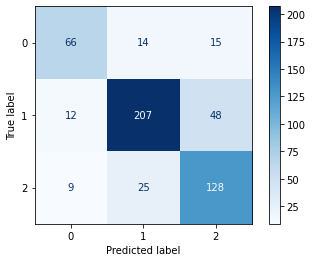

In [128]:
disp = plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='.3g')

In [129]:
disp.confusion_matrix

array([[ 66,  14,  15],
       [ 12, 207,  48],
       [  9,  25, 128]], dtype=int64)